In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv('../data/raw/heart.csv')
print("Data loaded successfully.")

Data loaded successfully.


In [149]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
print("Custom plotting settings applied.")

Custom plotting settings applied.


# Start of EDA

In [150]:
print("------Top 5 rows of the DataFrame------")
df.head()

------Top 5 rows of the DataFrame------


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [151]:
print("------Info of the DataFrame------")
df.info()

------Info of the DataFrame------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [152]:
print("------Descriptive statistics of the DataFrame------")
df.describe()

------Descriptive statistics of the DataFrame------


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [153]:
print("------Check for duplicates------")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

------Check for duplicates------
Number of duplicate rows: 0


In [154]:
print("------ Unique values for low-cardinality columns ------")
for col in df.select_dtypes(include=['object']).columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")

# Manually check in numeric columns identified in df.info()
print("\nColumn 'FastingBS':")
print(df['FastingBS'].value_counts(dropna=False))

print("\nColumn 'HeartDisease':")
print(df['HeartDisease'].value_counts(dropna=False))



------ Unique values for low-cardinality columns ------
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']

Column 'FastingBS':
FastingBS
0    704
1    214
Name: count, dtype: int64

Column 'HeartDisease':
HeartDisease
1    508
0    410
Name: count, dtype: int64


# <ins>Notes</ins>
* All data types are correct

* No missing values

* No duplicates

* All low-cardinality columns have correct values

*No missing values so no imputation required**

<b>Next Step - Outlier Detection</b>

------ Outliers detection in numeric columns ------
Visualizing outliers using boxplots


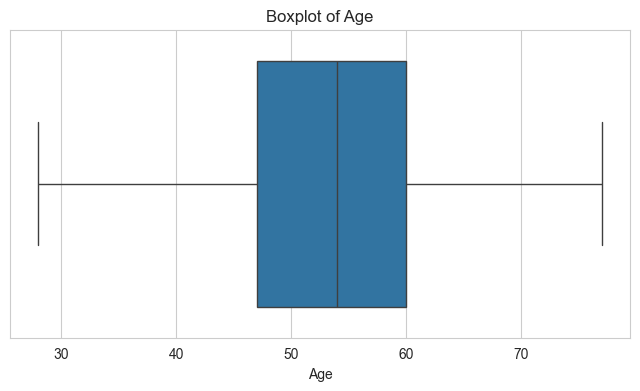

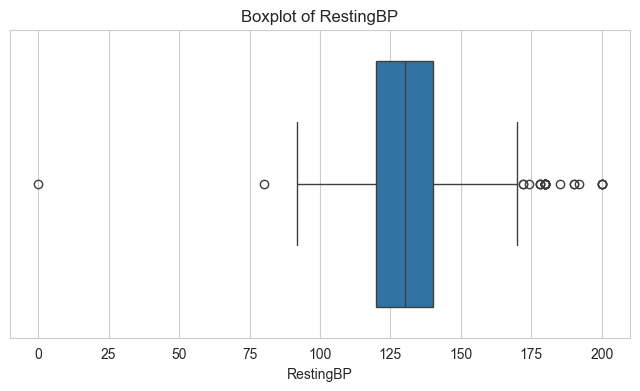

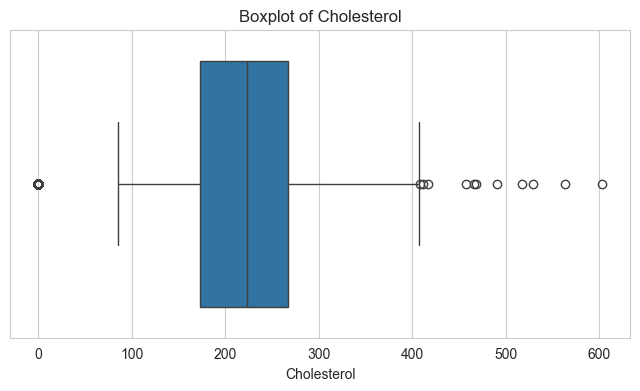

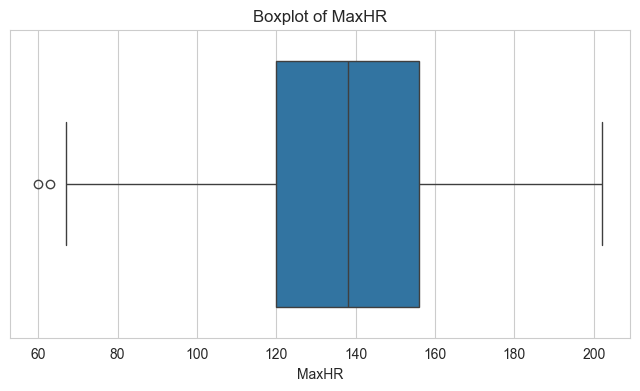

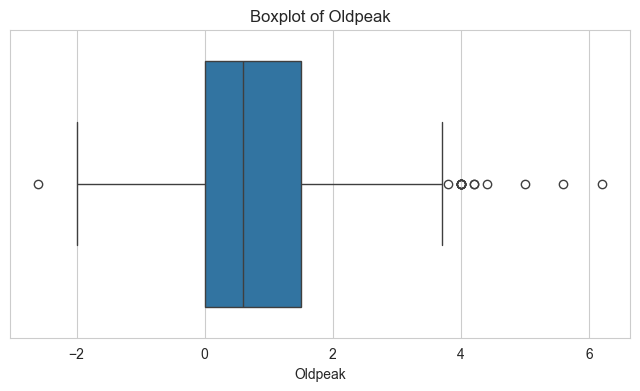

In [155]:
print("------ Outliers detection in numeric columns ------")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if 'HeartDisease' in numerical_cols: numerical_cols.remove('HeartDisease')
if 'FastingBS' in numerical_cols: numerical_cols.remove('FastingBS')

print("Visualizing outliers using boxplots")
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [156]:
print("Statistical outlier detection using IQR method")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}': {len(outliers)} potential outliers detected outside IQR bounds.")
    else:
        print(f"Column '{col}': No outliers detected")

Statistical outlier detection using IQR method
Column 'Age': No outliers detected
Column 'RestingBP': 28 potential outliers detected outside IQR bounds.
Column 'Cholesterol': 183 potential outliers detected outside IQR bounds.
Column 'MaxHR': 2 potential outliers detected outside IQR bounds.
Column 'Oldpeak': 16 potential outliers detected outside IQR bounds.


In [157]:
if 'RestingBP' in df:
    temp_restingBP = df['RestingBP'].replace(0, np.nan)
    df['RestingBP'] = temp_restingBP.fillna(temp_restingBP.mean())

    upper_bound_restingBP = df['RestingBP'].quantile(0.99)
    print(f"Upper bound for 'RestingBP': {upper_bound_restingBP:.2f} (99th percentile)")

    
    
    lower_bound_restingBP = df['RestingBP'].quantile(0.001)
    print(f"Lower bound for 'RestingBP': {lower_bound_restingBP:.2f} (1st percentile)")

Upper bound for 'RestingBP': 180.00 (99th percentile)
Lower bound for 'RestingBP': 91.00 (1st percentile)


In [158]:
# Code for capping between chosen percentiles, however not needed for this feature.
""" df['RestingBP'] = np.where(df['RestingBP'] > upper_bound_restingBP,
                                upper_bound_restingBP, df['RestingBP'])

df['RestingBP'] = np.where(df['RestingBP'] < lower_bound_restingBP,
                                lower_bound_restingBP, df['RestingBP'])

print(f"Capped 'RestingBP' values between {lower_bound_restingBP:.2f} and {upper_bound_restingBP:.2f} values. (1st and 99th percentiles)") """

' df[\'RestingBP\'] = np.where(df[\'RestingBP\'] > upper_bound_restingBP,\n                                upper_bound_restingBP, df[\'RestingBP\'])\n\ndf[\'RestingBP\'] = np.where(df[\'RestingBP\'] < lower_bound_restingBP,\n                                lower_bound_restingBP, df[\'RestingBP\'])\n\nprint(f"Capped \'RestingBP\' values between {lower_bound_restingBP:.2f} and {upper_bound_restingBP:.2f} values. (1st and 99th percentiles)") '

In [159]:
if 'Cholesterol' in df:
    temp_cholesterol = df['Cholesterol'].replace(0, np.nan)
    df['Cholesterol'] = temp_cholesterol.fillna(temp_cholesterol.median())

In [161]:
df.to_csv('heart_cleaned.csv', index=False)
print("Data cleaned and saved to 'heart_cleaned.csv'.")

Data cleaned and saved to 'heart_cleaned.csv'.


# <ins> Notes </ins>
* Zero values in RestingBP treated as error and replaced with median and no capping required

* Zero values in Cholesterol treated as error and replaced with median and no capping required

* No errors or outliers identified in MaxHR and Oldpeak

<b> Next Step - EDA </b>

In [163]:
df = pd.read_csv('../data/processed/heart_cleaned.csv')
print("Data reloaded from 'heart_cleaned.csv' for EDA.")

Data reloaded from 'heart_cleaned.csv' for EDA.


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


In [169]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
target_feature = 'HeartDisease'

------Numerical feature distribution plots------


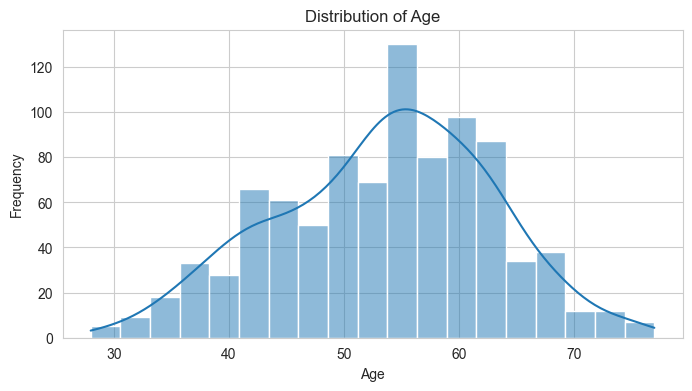

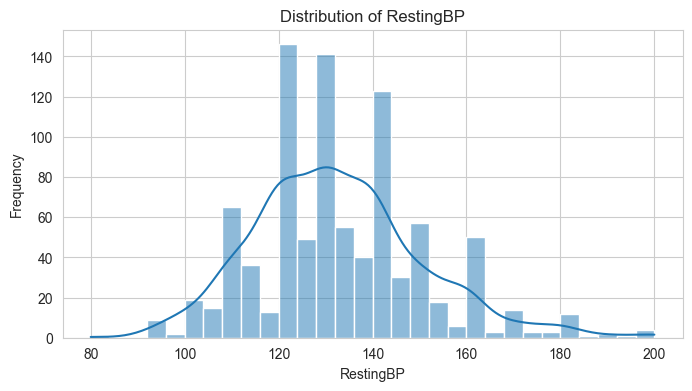

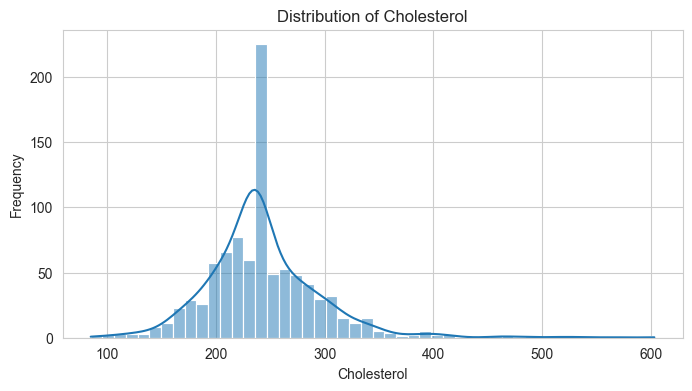

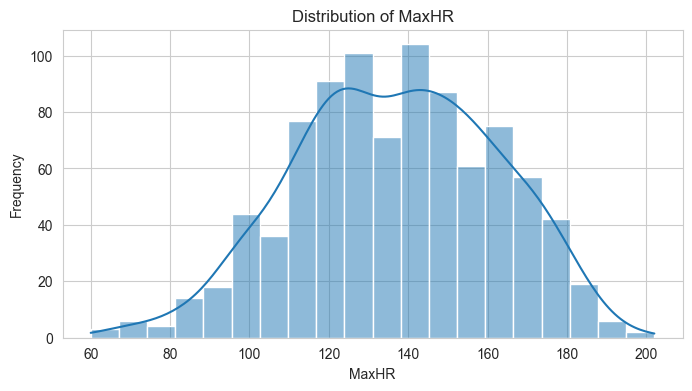

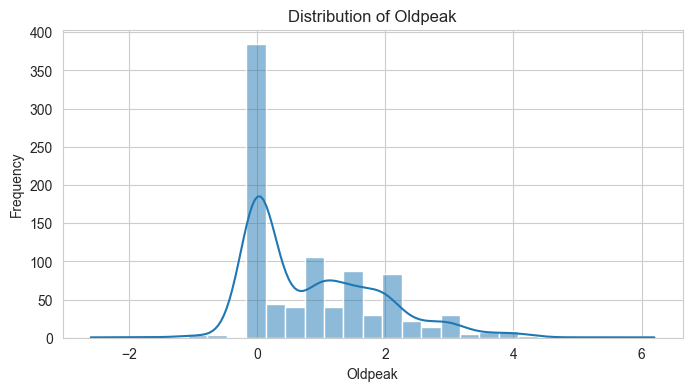

In [176]:
print("------Numerical feature distribution plots------")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [192]:
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"Skewness of {col}: {skewness:.2f}")

Skewness of Age: -0.20
Skewness of RestingBP: 0.61
Skewness of Cholesterol: 1.45
Skewness of MaxHR: -0.14
Skewness of Oldpeak: 1.02


# <ins> Observations </ins>
* Age: Range ~ 30 - 80 which is typical for this type of study, slightly left-skewed distribution(-0.20), peak at ~ 55.
* RestingBP: Slighlty right-skewed distribution(0.61), multi-modal data with peaks at 120, 130, 140 (staff or equipment may be rounding measurements), 
* Cholesterol: Highly right-skewed distribution(1.45), highly represented value at ~250 
* MaxHR: Very slightly left-skewed distribution(-0.14)
* Oldpeak: Right-skewed distribution(1.02), multi-modal with main peak at 0 then three smaller peaks at ~1, 1.5, 2.

<b> Actions: </b>
After bivariate analysis there are options to create binned categories e.g. age_groups. Also option to log transform highly skewed features e.g. cholesterol.


------ Categorical feature distribution plots ------
Distribution of Sex


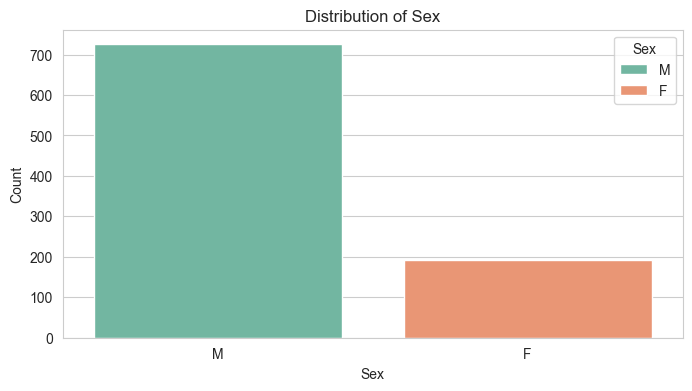

Value counts for 'Sex':
Sex
M    725
F    193
Name: count, dtype: int64
Percentage distribution for 'Sex':
Sex
M    78.976035
F    21.023965
Name: proportion, dtype: float64
------------------------------
Distribution of ChestPainType


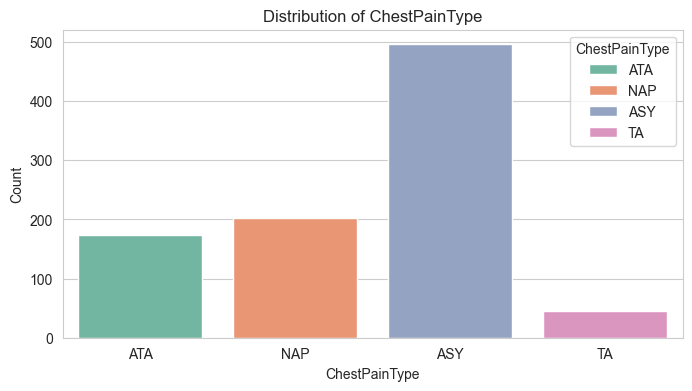

Value counts for 'ChestPainType':
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
Percentage distribution for 'ChestPainType':
ChestPainType
ASY    54.030501
NAP    22.113290
ATA    18.845316
TA      5.010893
Name: proportion, dtype: float64
------------------------------
Distribution of FastingBS


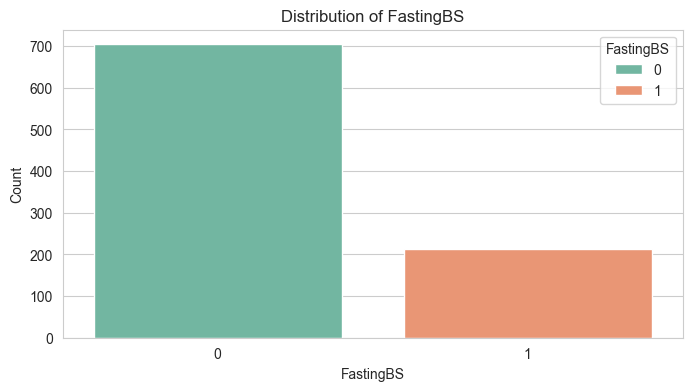

Value counts for 'FastingBS':
FastingBS
0    704
1    214
Name: count, dtype: int64
Percentage distribution for 'FastingBS':
FastingBS
0    76.688453
1    23.311547
Name: proportion, dtype: float64
------------------------------
Distribution of RestingECG


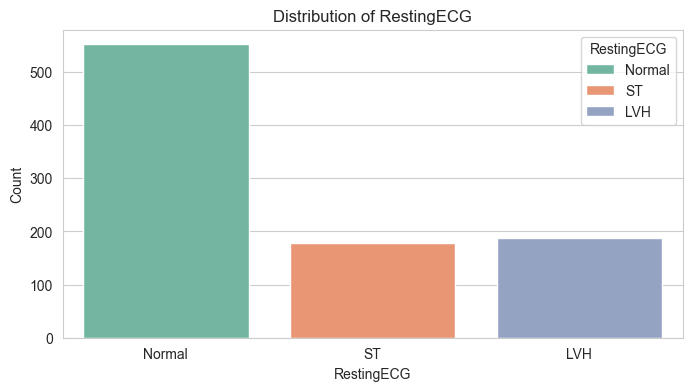

Value counts for 'RestingECG':
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
Percentage distribution for 'RestingECG':
RestingECG
Normal    60.130719
LVH       20.479303
ST        19.389978
Name: proportion, dtype: float64
------------------------------
Distribution of ExerciseAngina


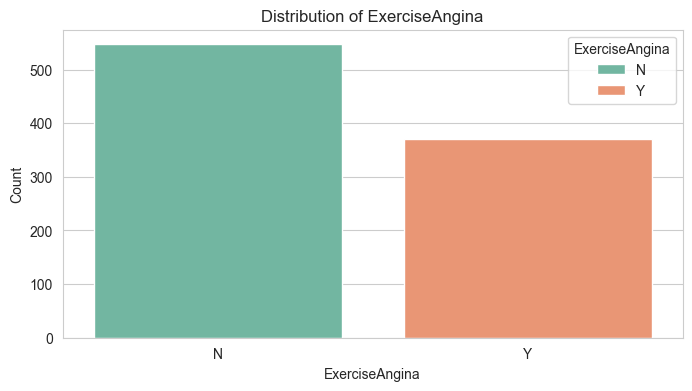

Value counts for 'ExerciseAngina':
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
Percentage distribution for 'ExerciseAngina':
ExerciseAngina
N    59.586057
Y    40.413943
Name: proportion, dtype: float64
------------------------------
Distribution of ST_Slope


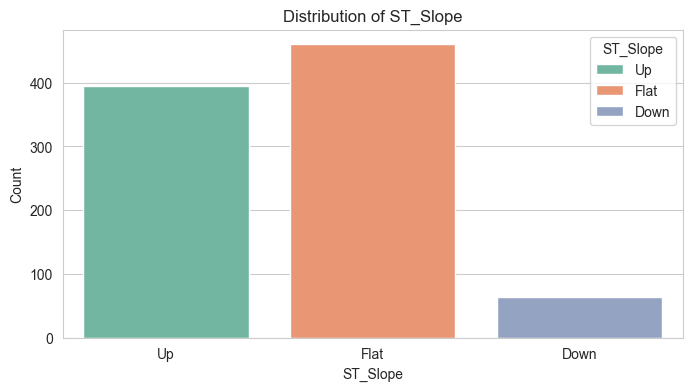

Value counts for 'ST_Slope':
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
Percentage distribution for 'ST_Slope':
ST_Slope
Flat    50.108932
Up      43.028322
Down     6.862745
Name: proportion, dtype: float64
------------------------------


In [186]:
print("------ Categorical feature distribution plots ------")
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], hue = df[col], palette='Set2', legend=True)
    print(f'Distribution of {col}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print(f"Percentage distribution for '{col}':")
    print(df[col].value_counts(normalize=True) * 100)
    print("-" * 30)


------ Target variable distribuution ------


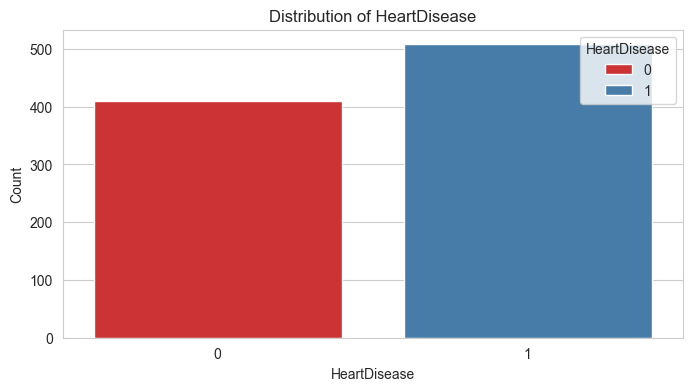


Value counts for 'HeartDisease':
HeartDisease
1    508
0    410
Name: count, dtype: int64
Percentage distribution for 'HeartDisease':
HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64
------------------------------


In [189]:
print("------ Target variable distribuution ------")
plt.figure(figsize=(8, 4))
sns.countplot(x=df[target_feature], hue=df[target_feature], palette='Set1')
plt.title(f'Distribution of {target_feature}')
plt.xlabel(target_feature)
plt.ylabel('Count')
plt.show()

print(f"\nValue counts for '{target_feature}':")
print(df[target_feature].value_counts())
print(f"Percentage distribution for '{target_feature}':")
print(df[target_feature].value_counts(normalize=True) * 100)
print("-" * 30)

# <ins> Observations </ins>
* Men are more represented in the data - 79% M to 21% F.
* Rest of distributions are either balanced or unbalanced but explainable (normal levels more frequent)

<b> Actions </b>

Categorical features which are not in numerical format must be encoded to numeric values.
* Sex and ExerciseAngina will be mapped to binary format
* ST_Slope, RestingECG and ChestPainType will be one hot encoded. Considerations were made and ST_Slope was determined to not be ordinal and therefore one hot encoding is appropriate.